<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CUxx_Nombre del caso de uso</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>08.- Data Split</font>

<font color='steelblue'>Data Split is the process of selecting the appropriate division of the data set into train, test and validation set.</font>

## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Train and Test Rate Evaluation</b>	

<font color='steelblue'><b>Split Train and Test Datasets	


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: xxxxxxxxxx</font>
- <font color='steelblue'> <b>Output File: xxxxxxxxxx</font>

## <font color='green'>Settings</font>

In [1]:
# Libraries to use
import os
from pathlib import Path
import pandas as pd
import easygui as GUI
import matplotlib.pyplot as plt
import numpy as np
from numpy import isnan
from numpy import mean
from numpy import std
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
#from sklearn.experimental import enable_hist_gradient_boosting
# Models
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.cross_decomposition import *
from sklearn.tree import *
from sklearn.dummy import *
from sklearn.gaussian_process import *
from sklearn.isotonic import *
from sklearn.neighbors import *
from sklearn.kernel_ridge import *
from sklearn.svm import *
from sklearn.multioutput import *
from sklearn.compose import *
from sklearn.naive_bayes import *
from sklearn.discriminant_analysis import *
from sklearn.calibration import *
from sklearn.gaussian_process import *
from sklearn.neural_network import *


## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [2]:
# Data load using "easygui" library
file_data=GUI.fileopenbox(title='Open Data File', default="Data/Input/", filetypes="*.*")

<font color='tomato'>Utilizamos en todos los notebooks SIEMPRE <b>data</b> como nombre de la matriz (dataframe) principal donde cargamos los datos.</font>

In [2]:
# Data file to dataframe
data = pd.read_csv(file_data)

NameError: name 'pd' is not defined

In [3]:
data.head()

NameError: name 'data' is not defined

<font color='tomato'><b> OPCION B:</b> Directamente</font>

In [2]:
file_name='diabetes.csv'
data = pd.read_csv('Data/Input/'+file_name)

<font color='tomato'>Visualizo los datos.</font>

In [1]:
data

NameError: name 'data' is not defined

## Split Rate  Evaluation

An soft evaluation is performed in order to estimate Split Rate.

### Classification Rate Evaluation

<font color='tomato'>Parámetros para la Soft-Evaluation</font>

In [14]:
# Data type B=Balanced, I=Imbalanced
balan='B'

# Classification type B=Binary, M=Multi_Class
classific = 'B'

# Prediction type L=Labels, P=Probabilities
predict='L'

# Set validation Rates
rates = [0.90, 0.75, 0.50, 0.40, 0.30, 0.20, 0.15, 0.10, 0.05]

# Number of rounds to average the random split effect
rounds = 20


<font color='tomato'>Métricas para la Soft-Evaluation</font>

In [15]:
# Metrics selection
problem_type=balan+classific+predict
if problem_type=='BML':  
        metrics = [
            ("Accuracy", 'accuracy_score(y_test, y_pred)'),          
            ("Precision", 'precision_score(y_test, y_pred, average="'"micro"'")'),
            ("APS", 'average_precision_score(y_test, y_pred, average="'"micro"'")'),
            ("Recall", 'recall_score(y_test, y_pred, average="'"micro"'"")'),
            ("APS", 'average_precision_score(y_test, y_pred, average="'"micro"'")'),
            ("F1_Score", 'f1_score(y_test, y_pred, average="'"micro"'")')
        ]
elif problem_type=='BMP':  
        metrics = [
            ("LogLoss", 'log_loss(y_test, y_pred)'),
            ("BrierScore", 'brier_score_loss(y_test, y_pred)'),
        ]           
elif problem_type=='BBL':  
        metrics = [
            ("Accuracy", 'accuracy_score(y_test, y_pred)'),          
            ("Precision", 'precision_score(y_test, y_pred)'),
            ("APS", 'average_precision_score(y_test, y_pred)'),
            ("Recall", 'recall_score(y_test, y_pred)'),
            ("APS", 'average_precision_score(y_test, y_pred)'),
            ("F1_Score", 'f1_score(y_test, y_pred)')
        ]     
elif problem_type=='BBP':  
        metrics = [
            ("LogLoss", 'log_loss(y_test, y_pred)'),
            ("BrierScore", 'brier_score_loss(y_test, y_pred)'),
        ]   
elif problem_type=='IML':  
        metrics = [
            ("Accuracy", 'accuracy_score(y_test, y_pred)'),
            ("F1_Score", 'f1_score(y_test, y_pred, average="'"micro"'")')
            ("Fbeta_Score", 'f_betascore(y_test, y_pred, average="'"micro"'", beta=0.5)')
            ("Fbeta_Score", 'f_betascore(y_test, y_pred, average="'"micro"'", beta=2)')
        ]
elif problem_type=='IMP':  
        metrics = [
            ("LogLoss", 'log_loss(y_test, y_pred)'),
            ("BrierScore", 'brier_score_loss(y_test, y_pred)'),
        ]   
elif problem_type=='IBL':  
        metrics = [
            ("Accuracy", 'accuracy_score(y_test, y_pred)'),
            ("F1_Score", 'f1_score(y_test, y_pred, average="'"binary"'")')
            ("Fbeta_Score", 'f_betascore(y_test, y_pred, average="'"binary"'", beta=0.5)')
            ("Fbeta_Score", 'f_betascore(y_test, y_pred, average="'"binary"'", beta=2)')        ]
elif problem_type=='IBP':  
        metrics = [
            ("LogLoss", 'log_loss(y_test, y_pred)'),
            ("BrierScore", 'brier_score_loss(y_test, y_pred)'),
        ]   
else:
    print('ERROR: selecting metrics') 

<font color='tomato'>Modelos para la Soft-Evaluation</font>

In [16]:
# Models Selection
# Popular for binary classification:
    #	Logistic Regression
    #	k-Nearest Neighbors
    #	Decision Trees
    #	Support Vector Machine
    #•	Naive Bayes
# Popular for multi-class classification include:
    #	k-Nearest Neighbors
    #	Decision Trees
    #	Naive Bayes
    #	Random Forest
    #	Gradient Boosting
# Popular for multi-label classification include:
    #	Multi-label Decision Trees
    #	Multi-label Random Forests
    #	Multi-label Gradient Boosting

classifiers = [
    #("AdaBoostClassifier", AdaBoostClassifier()),
    #("BaggingClassifier", BaggingClassifier()),
    #("BernoulliNB", BernoulliNB()),
    #("CalibratedClassifierCV", CalibratedClassifierCV()),
    #("CategoricalNB", CategoricalNB()),
    #("CheckingClassifier", CheckingClassifier()),
    #("ClassifierChain", ClassifierChain()),
    #("ComplementNB", ComplementNB()),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    #("DummyClassifier", DummyClassifier()),
    #("ExtraTreeClassifier", ExtraTreeClassifier()),
    #("ExtraTreesClassifier", ExtraTreesClassifier()),
    ("GaussianNB", GaussianNB()),
    #("GaussianProcessClassifier", GaussianProcessClassifier()),
    #("GradientBoostingClassifier", GradientBoostingClassifier()),
    #("HistGradientBoostingClassifier", HistGradientBoostingClassifier()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    #("LabelPropagation", LabelPropagation()),
    #("LabelSpreading", LabelSpreading()),
    #("LinearDiscriminantAnalysis", LinearDiscriminantAnalysis()),
    #("LinearSVC", LinearSVC()),
    #("LogisticRegression", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / data.shape[0])),
    ("LogisticRegression", LogisticRegression()),
    #("LogisticRegressionCV", LogisticRegressionCV()),
    #("MLPClassifier", MLPClassifier()),
    #("MultiOutputClassifier", MultiOutputClassifier()),
    ("MultinomialNB", MultinomialNB()),
    #("NearestCentroid", NearestCentroid()),
    #("NuSVC", NuSVC()),
    #("OneVsOneClassifier", OneVsOneClassifier()),
    #("OneVsRestClassifier", OneVsRestClassifier()),
    #("OutputCodeClassifier", OutputCodeClassifier()),
    #("PassiveAggressive I", PassiveAggressiveClassifier(loss='hinge', C=1.0, tol=1e-4)),
    #("PassiveAggressive II", PassiveAggressiveClassifier(loss='squared_hinge', C=1.0, tol=1e-4)),
    #("Perceptron", Perceptron()),
    #("QuadraticDiscriminantAnalysis", QuadraticDiscriminantAnalysis()),
    #("RadiusNeighborsClassifier", RadiusNeighborsClassifier()),
    #("RandomForestClassifier", RandomForestClassifier()),
    #("RidgeClassifier", RidgeClassifier()),
    #("RidgeClassifierCV", RidgeClassifierCV()),
    #("SGDClassifier", SGDClassifier(max_iter=100),
    #("AverageSGDClassifier", SGDClassifier(average=True)),
    ("SVC", SVC()),
    #("StackingClassifier", StackingClassifier()),
    #("VotingClassifier", VotingClassifier())    
]

<font color='darkgrey'><b>Operation</font>

PROBLEM TYPE: BBL
Training metric Accuracy
...... Training model DecisionTreeClassifier
...... Training model GaussianNB
...... Training model KNeighborsClassifier
...... Training model LogisticRegression


C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

...... Training model MultinomialNB
...... Training model SVC


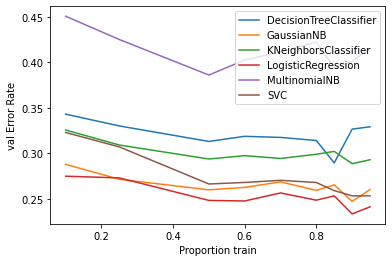

Training metric Precision
...... Training model DecisionTreeClassifier
...... Training model GaussianNB
...... Training model KNeighborsClassifier
...... Training model LogisticRegression


C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

...... Training model MultinomialNB
...... Training model SVC


C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


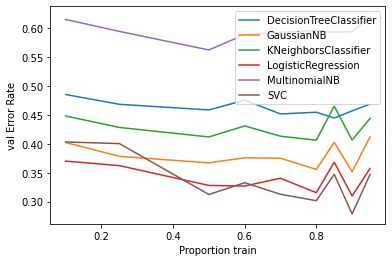

Training metric APS
...... Training model DecisionTreeClassifier
...... Training model GaussianNB
...... Training model KNeighborsClassifier
...... Training model LogisticRegression


C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

...... Training model MultinomialNB
...... Training model SVC


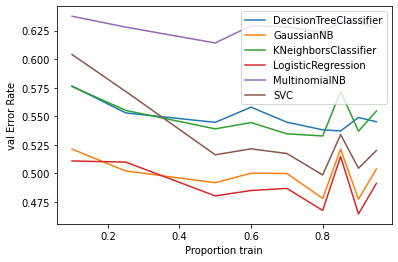

Training metric Recall
...... Training model DecisionTreeClassifier
...... Training model GaussianNB
...... Training model KNeighborsClassifier
...... Training model LogisticRegression


C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

...... Training model MultinomialNB
...... Training model SVC


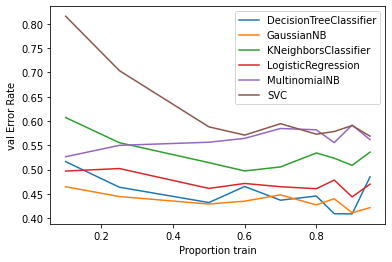

Training metric APS
...... Training model DecisionTreeClassifier
...... Training model GaussianNB
...... Training model KNeighborsClassifier
...... Training model LogisticRegression


C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

...... Training model MultinomialNB
...... Training model SVC


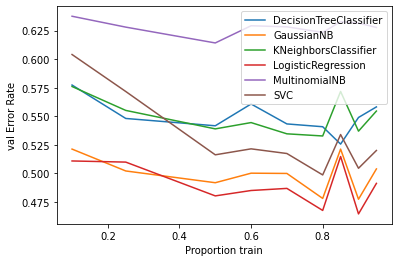

Training metric F1_Score
...... Training model DecisionTreeClassifier
...... Training model GaussianNB
...... Training model KNeighborsClassifier
...... Training model LogisticRegression


C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

...... Training model MultinomialNB
...... Training model SVC


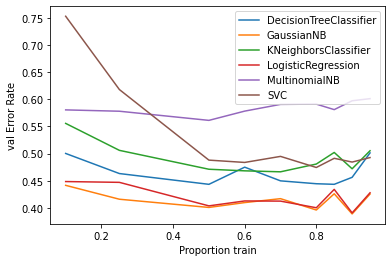

In [20]:
# Dataframe to Numpy
data_trans = data.values
# separate into input and output columns
# X, y Values
X = data_trans[:, :-1]
y = data_trans[:, -1]

xx = 1. - np.array(rates)
print("PROBLEM TYPE: %s" % problem_type)
for metric_name, metric in metrics:
    print("Training metric %s" % metric_name)
    for name, model in classifiers:
        print("...... Training model %s" % name)
        # Generate same random seed for all classifiers
        rng = np.random.RandomState(42)
        yy = []
        for i in rates:
            yy_ = []
            for r in range(rounds):
                if (balan=='B'):
                    X_train, X_test, y_train, y_test = \
                        train_test_split(X, y, test_size=i, random_state=rng)
                else: 
                    if (balan=='I'):   
                        X_train, X_test, y_train, y_test = \
                            train_test_split(X, y, test_size=i, random_state=rng, stratify=y)
                    else:
                        print('ERROR: must select B(Balanced) or I(Imbalanced)')           
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                # Selection of metric
                # error =  1 - Metric value
                yy_.append(1 - eval(metric))
            yy.append(np.mean(yy_))
        plt.plot(xx, yy, label=name)
    plt.legend(loc="upper right")
    plt.xlabel("Proportion train")
    plt.ylabel("val Error Rate")
    plt.show()

### Regression Rate Evaluation

<font color='tomato'>Parámetros para la Soft-Evaluation</font>

In [3]:
# Set validation Rates
rates = [0.90, 0.75, 0.50, 0.40, 0.30, 0.20, 0.15, 0.10, 0.05]

rounds = 20

<font color='tomato'>Métricas para la Soft-Evaluation</font>

In [2]:
metrics = [
            #("explained_variance_score)", 'explained_variance_score(y_test, y_pred)'),
            ("max_error", 'max_error(y_test, y_pred)'),
            ("mean_absolute_error", 'mean_absolute_error(y_test, y_pred)'),
            ("mean_squared_error", 'mean_squared_error(y_test, y_pred)'),
            #("mean_squared_log_error", 'mean_squared_log_error(y_test, y_pred)'),
            #("median_absolute_error", 'median_absolute_error(y_test, y_pred)'),
            #("mean_absolute_percentage_error", 'mean_absolute_percentage_error(y_test, y_pred)'),
            #("r2_score", 'r2_score(y_test, y_pred)'),
            #("mean_poisson_deviance", 'mean_poisson_deviance(y_test, y_pred)'),
            #("mean_gamma_deviance", 'mean_gamma_deviance(y_test, y_pred)'),
            #("mean_tweedie_deviance", 'mean_tweedie_deviance(y_test, y_pred)')
] 

<font color='tomato'>Modelos para la Soft-Evaluation</font>

In [7]:
# Algorithms Selection
regressors=[
    #("ARDRegression",ARDRegression()),
    ("AdaBoostRegressor",AdaBoostRegressor()),
    #("BaggingRegressor",BaggingRegressor()),
    #("BayesianRidge",BayesianRidge()),
    #("CCA",CCA()),
    #("DecisionTreeRegressor",DecisionTreeRegressor()),
    #("DummyRegressor",DummyRegressor()),
    #("ElasticNet",ElasticNet()),
    #("ElasticNetCV",ElasticNetCV()),
    #("ExtraTreeRegressor",ExtraTreeRegressor()),
    #("ExtraTreesRegressor",ExtraTreesRegressor()),
    #("GammaRegressor",GammaRegressor()),
    #("GaussianProcessRegressor",GaussianProcessRegressor()),
    #("GeneralizedLinearRegressor",GeneralizedLinearRegressor()),
    #("GradientBoostingRegressor",GradientBoostingRegressor()),
    #("HistGradientBoostingRegressor",HistGradientBoostingRegressor()),
    #("HuberRegressor",HuberRegressor()),
    #("IsotonicRegression",IsotonicRegression()),
    #("KNeighborsRegressor",KNeighborsRegressor()),
    #("KernelRidge",KernelRidge()),
    #("Lars",Lars()),
    #("LarsCV",LarsCV()),
    #("Lasso",Lasso()),
    #("LassoCV",LassoCV()),
    #("LassoLars",LassoLars()),
    #("LassoLarsCV",LassoLarsCV()),
    #("LassoLarsIC",LassoLarsIC()),
    #("LinearRegression",LinearRegression()),
    ("LinearSVR",LinearSVR()),
    #("MLPRegressor",MLPRegressor()),
    #("MultiOutputRegressor",MultiOutputRegressor()),
    #("MultiTaskElasticNet",MultiTaskElasticNet()),
    #("MultiTaskElasticNetCV",MultiTaskElasticNetCV()),
    #("MultiTaskLasso",MultiTaskLasso()),
    #("MultiTaskLassoCV",MultiTaskLassoCV()),
    #("NuSVR",NuSVR()),
    #("OrthogonalMatchingPursuit",OrthogonalMatchingPursuit()),
    #("OrthogonalMatchingPursuitCV",OrthogonalMatchingPursuitCV()),
    #("PLSCanonical",PLSCanonical()),
    #("PLSRegression",PLSRegression()),
    #("PassiveAggressiveRegressor",PassiveAggressiveRegressor()),
    #("PoissonRegressor",PoissonRegressor()),
    #("RANSACRegressor",RANSACRegressor()),
    #("RadiusNeighborsRegressor",RadiusNeighborsRegressor()),
    #("RandomForestRegressor",RandomForestRegressor()),
    #("RegressorChain",RegressorChain()),
    #("Ridge",Ridge()),
    #("RidgeCV",RidgeCV()),
    #("SGDRegressor",SGDRegressor()),
    #("SVR",SVR()),
    #("StackingRegressor",StackingRegressor()),
    #("TheilSenRegressor",TheilSenRegressor()),
    #("TransformedTargetRegressor",TransformedTargetRegressor()),
    #("TweedieRegressor",TweedieRegressor()),
    #("VotingRegressor",VotingRegressor())
]

<font color='darkgrey'><b>Operation</font>

Training metric max_error
...... Training model AdaBoostRegressor
...... Training model LinearSVR


C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

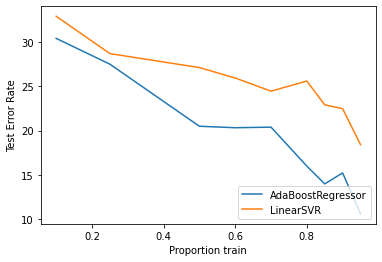

Training metric mean_absolute_error
...... Training model AdaBoostRegressor
...... Training model LinearSVR


C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

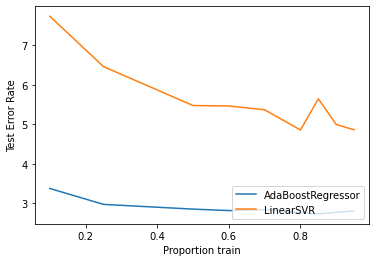

Training metric mean_squared_error
...... Training model AdaBoostRegressor
...... Training model LinearSVR


C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Eugenio\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarni

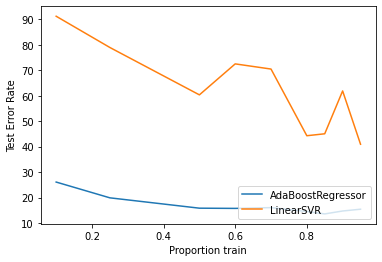

In [8]:
# Dataframe to Numpy
data_trans = data.values

# separate into input and output columns
# X, y Values
X = data_trans[:, :-1]
y = data_trans[:, -1]

xx = 1. - np.array(rates)

for metric_name, metric in metrics:
    print("Training metric %s" % metric_name)
    for name, model in regressors:
        print("...... Training model %s" % name)
        # Generate same random seed for all classifiers
        rng = np.random.RandomState(42)
        yy = []
        for i in rates:
            yy_ = []
            for r in range(rounds):
                X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, test_size=i, random_state=rng)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                yy_.append(eval(metric))
            yy.append(np.mean(yy_))
        plt.plot(xx, yy, label=name)
    plt.legend(loc="lower right")
    plt.xlabel("Proportion train")
    plt.ylabel("test Error Rate")
    plt.show()

#### Clustering Rate Evaluation

<font color='crimson'>You do not use training and valing in unsupervised learning. There is no objective function in unsupervised learning to val the performance of the algorithm.</font>

## Split Train and Test datasets

Estimada el porcentaje de división (Rate of Split) procedemos a realiar la división correspondiente del fichero entre Train y Test.

<font color='tomato'>Parámetros para el Split</font>

In [22]:
# Set validation Rates
rate=0.25 

# Data Balanced/Imbalanced. B=Balanced, I=Imbalanced
balan='B'

<font color='darkgrey'><b>Operation</font>

In [23]:
# Dataframe to Numpy
data_trans = data.values
# separate into input and output columns
# X, y Values
X = data_trans[:, :-1]
y = data_trans[:, -1]
# X_train, y_train, X_test, y_test Values
if (balan=='B'):
    print('Balanced Data')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=rate, random_state=1)
    # summarize
    print('Train', X_train.shape, y_train.shape)
    print('Validation', X_test.shape, y_test.shape)
else: 
    if (balan=='I'):   
        print('Imbalanced Data')
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=rate, stratify=y)
        # summarize
        print('Train', X_train.shape, y_train.shape)
        print('Validation', X_test.shape, y_test.shape)
    else:
        print('ERROR')


Balanced Data
Train (432, 8) (432,)
val (144, 8) (144,)


In [24]:
# Final dataframes generation to save

# X, y DataFrames
X_df=pd.DataFrame(X)
X_df.columns=X_names
y_df=pd.DataFrame(y)
y_df.columns=[y_name]

# X_train, y_train DataFrames
X_train_df=pd.DataFrame(X_train)
X_train_df.columns=X_names
y_train_df=pd.DataFrame(y_train)
y_train_df.columns=[y_name]

# X_test, y_test DataFrames
X_test_df=pd.DataFrame(X_test)
X_test_df.columns=X_names
y_test_df=pd.DataFrame(y_test)
y_test_df.columns=[y_name]

# Train and test DataFrames
Data_train_df=pd.concat([X_train_df,y_train_df], axis=1)
Data_test_df=pd.concat([X_test_df,y_test_df], axis=1)

## <font color='green'>Data Save</font>

<font color='tomato'> Identificamos los datos a guardar</font>

In [7]:
data_to_save = data

<font color='tomato'>Extensión añadida al nombre del fichero: será el número del proceso que lo genera (e.g. diabetes_06).</font>

<font color='tomato'>En caso de generarse varios ficheros llevarán _01 _02 ... después (e.g. diabetes_06_01).</font>

In [8]:
# Proceso 08
extension='_08'

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [11]:
# Guardamos el fichero
file_save=basename(file_data).replace('.csv',extension+'.csv')
path_save="Data/Output/"+file_save
path_out=GUI.filesavebox(title='Save Data File',default=path_save)
data_to_save.to_csv(path_out, index=False)
print('Falie saved as:')
path_out

Falie saved as:


<font color='tomato'><b> OPCION B:</b> Directamente</font>

In [10]:
file_save=basename(file_name).replace('.csv',extension+'.csv')
data_to_save.to_csv('Data/Output/' + file_save, index=False)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

Ejemplos
- Se han modificado los nombres de las columnas
- Se han eliminado blancos en los nombres de las columnas
- Se han traducido los nombres de las columnas

## <font color=' #2874a6 '>Main Conclusions</font>

Ejemplos
- Los nombre de las columnas de origen son muy largos lo que provoca que ...
- ......

## <font color='RED'>CODE TO DEPLOY</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- xxxxxx
- xxxxxx
- xxxxxx

<font color=' red '><b>CODE</b></font>

In [1]:
# 
